In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Data Source:
https://www.kaggle.com/datasets/ankitsharma0467/factors-influence-the-home-prices-across-us

In [ ]:
dem_df = pd.read_csv('demand_data.csv')
sup_df = pd.read_csv('supply_data.csv')

In [ ]:
#Convert to Datetimes
dem_df['DATE'] = pd.to_datetime(dem_df['DATE'])
sup_df['Period'] = pd.to_datetime(sup_df['Period'], format='%d-%m-%Y'). dt.strftime('%Y-%m-%d')
sup_df.rename(columns={'Period': 'DATE'}, inplace=True)
sup_df['DATE'] = pd.to_datetime(sup_df['DATE'])

In [ ]:
#Merge Data
df = pd.merge(dem_df, sup_df)
df.to_csv('supp_dem.csv', index=False)

In [ ]:
# Extract year, month, and day From DATE column so the model can train easily
df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month
df['day'] = df['DATE'].dt.day

In [ ]:
#drop Date column
df = df.drop('DATE', axis=1)
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
factors = ['UNEM_RATE', 'MORTGAGE', 'GDPC1', 'FORECLOSURES', 'HPI']

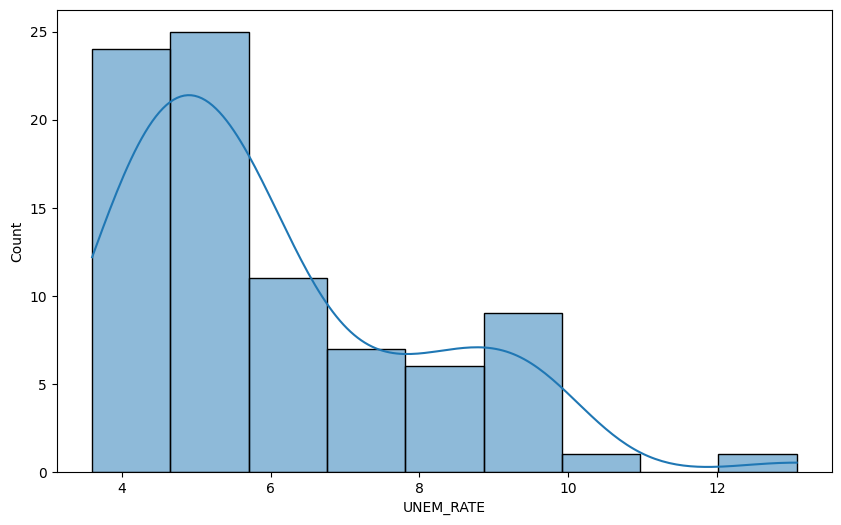

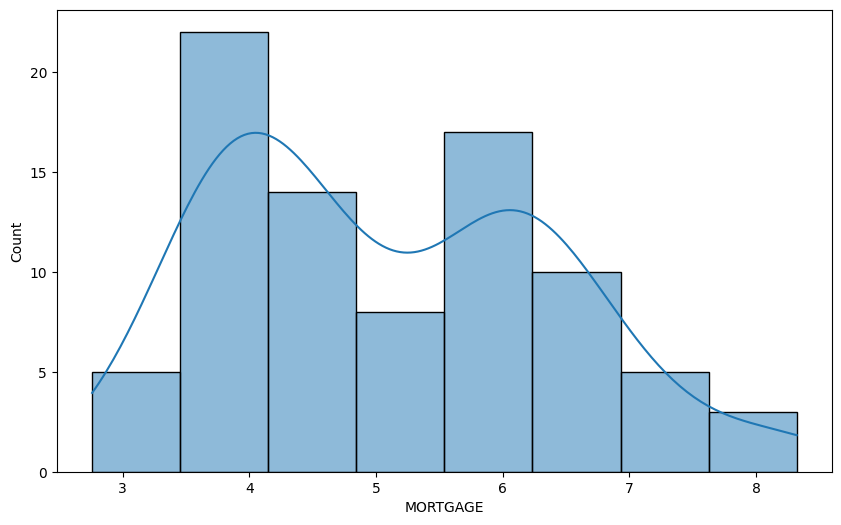

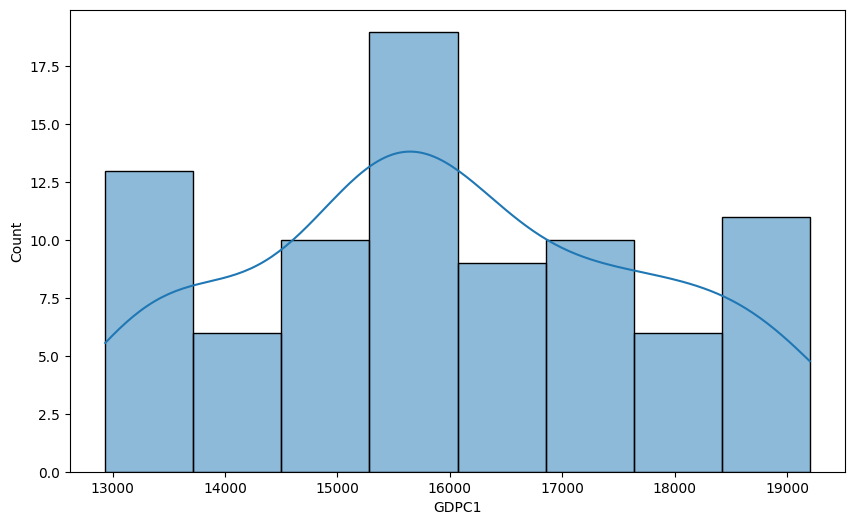

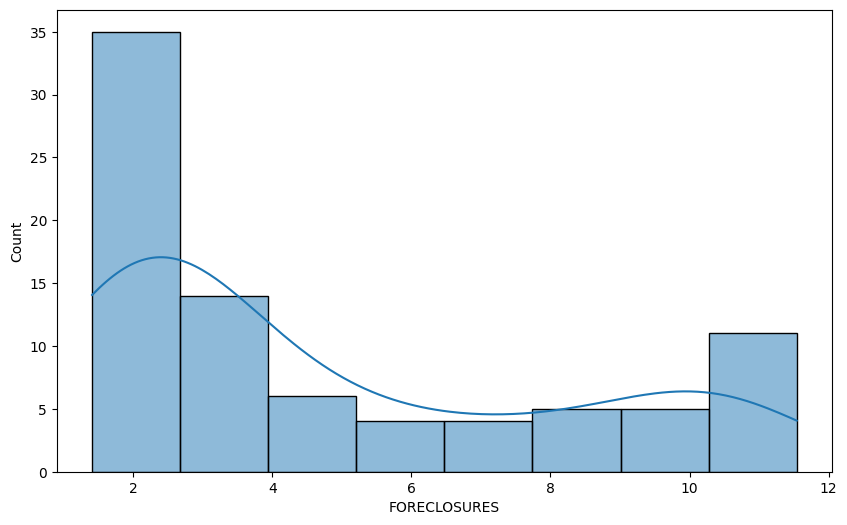

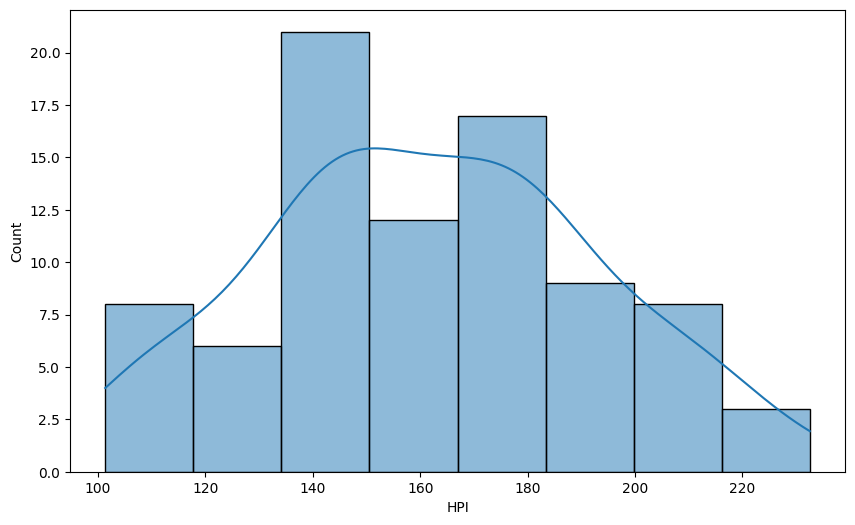

In [ ]:
for factor in factors:
  plt.figure(figsize=(10, 6))
  sns.histplot(df[factor],kde=True)

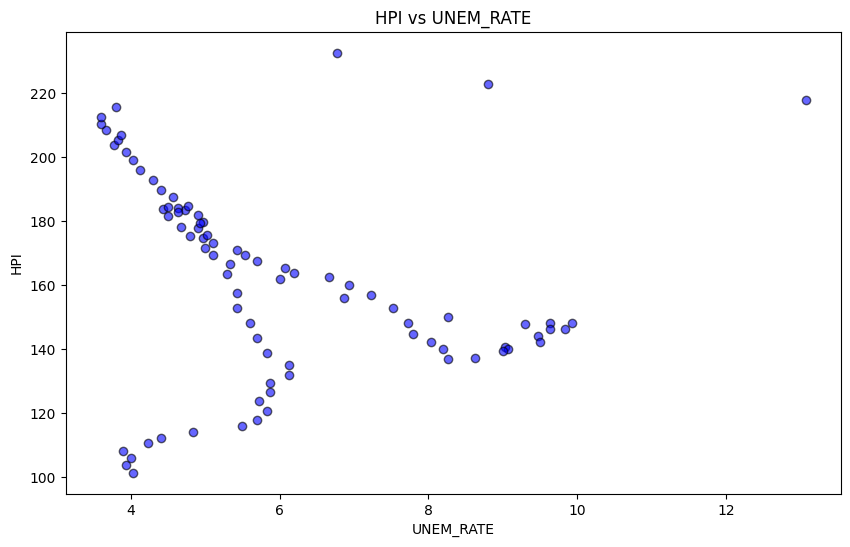

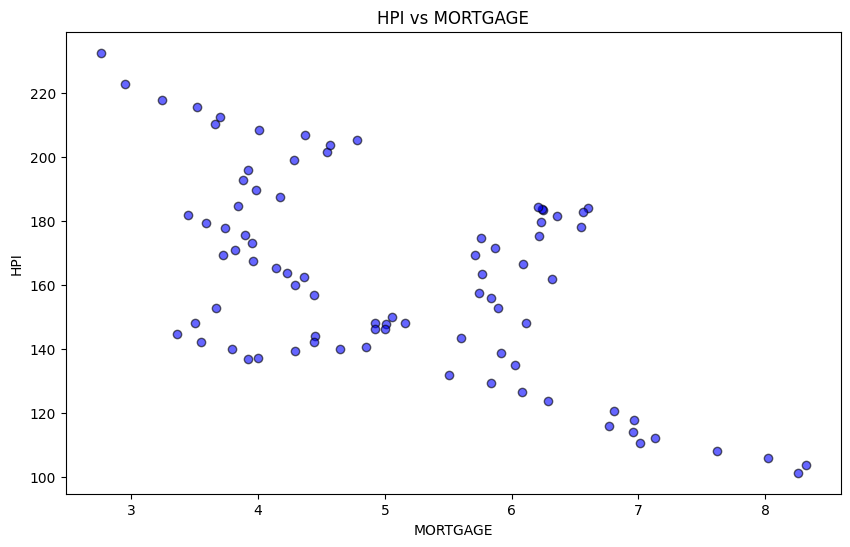

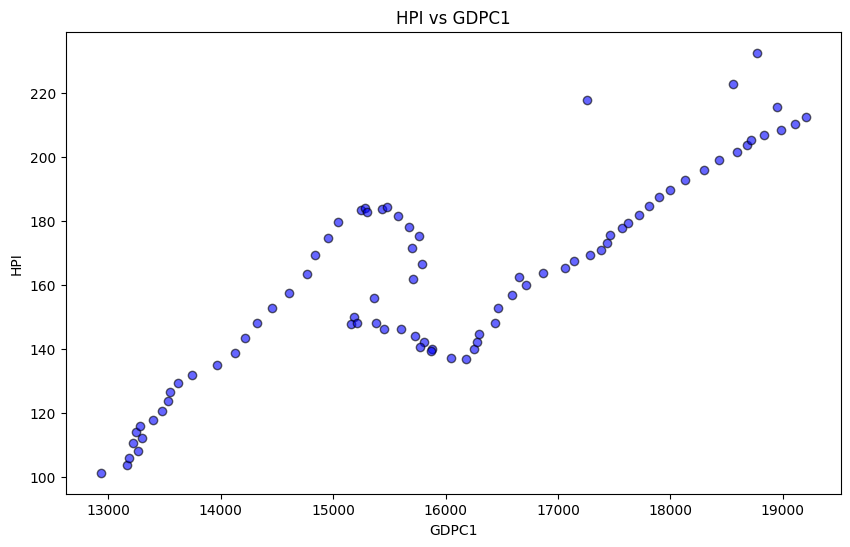

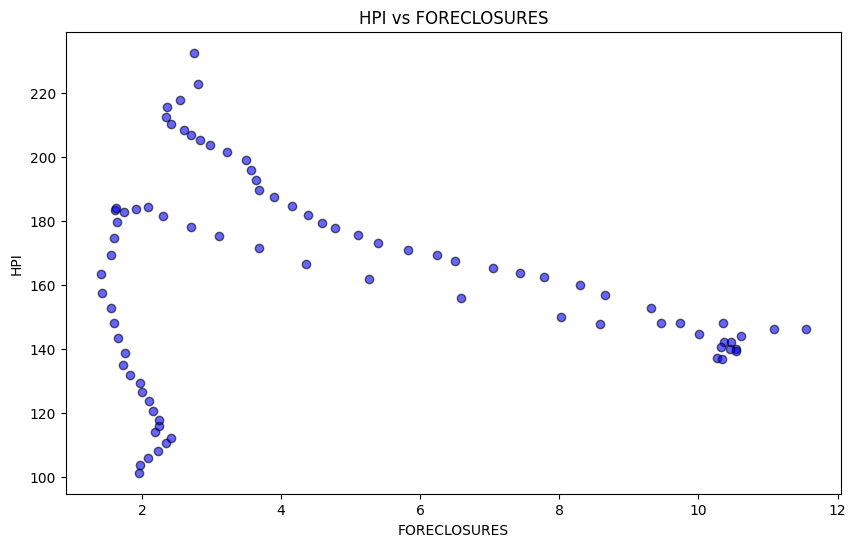

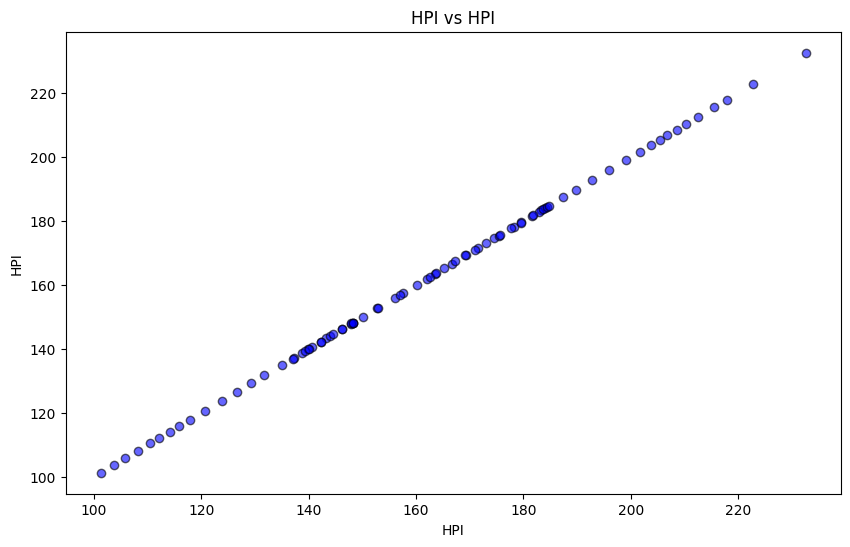

In [ ]:
hpi_column = 'HPI'
for factor in factors:
  plt.figure(figsize=(10, 6))
  plt.scatter(df[factor], df[hpi_column ], alpha=0.6, color='b', edgecolor='k')
  plt.title(f'HPI vs {factor}')
  plt.xlabel(factor)
  plt.ylabel(hpi_column)
  plt.show()

HPI decreases as mortgage prices incease suggesting a negative correlation.

HPI increases as mortgage prices increase suggesting a positive correlation.

HPI vs Foreclosures and HPI vs UNEM Rates don't have a clear correlation.

In [ ]:
factors2 = ['Permit_Number', 'construction', 'Homes_Sold', 'Housing_Starts']

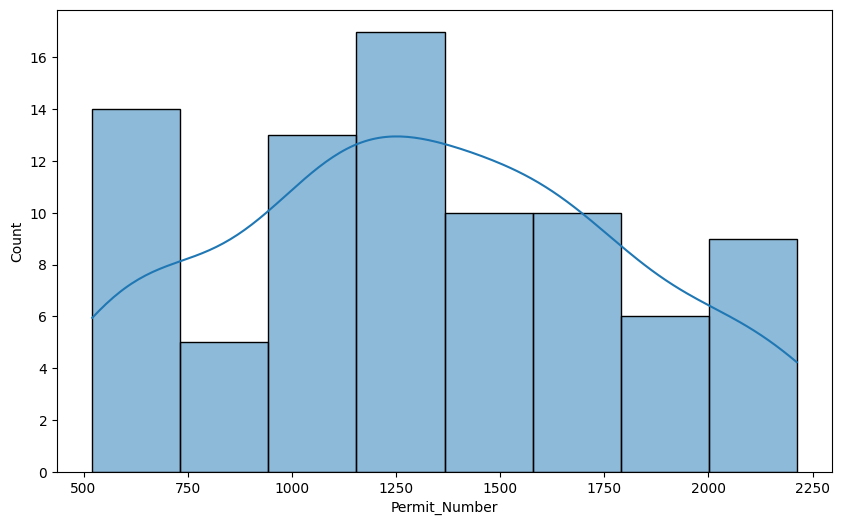

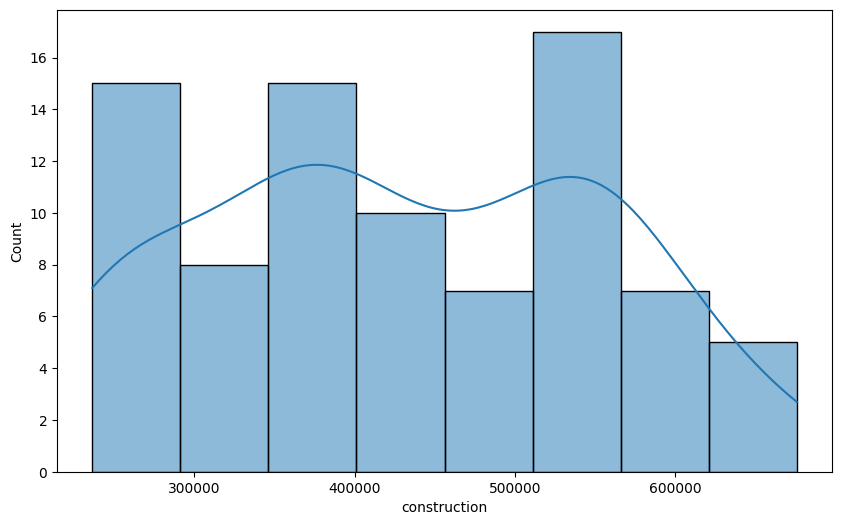

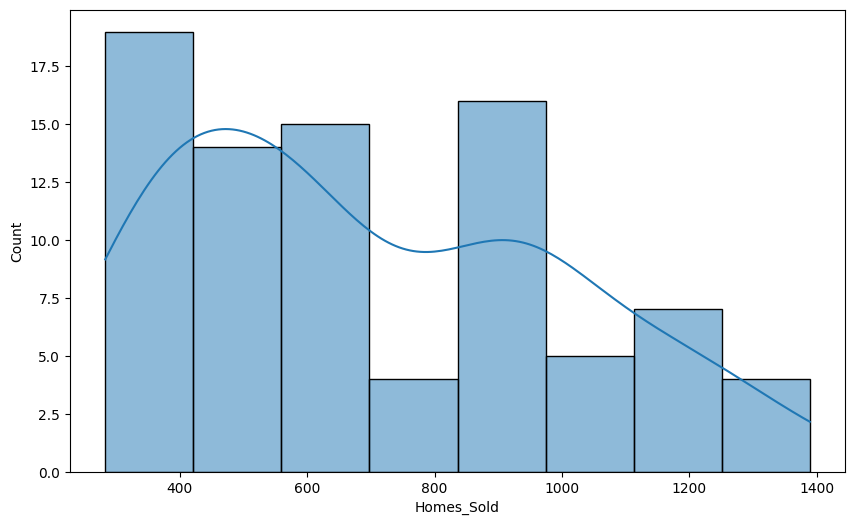

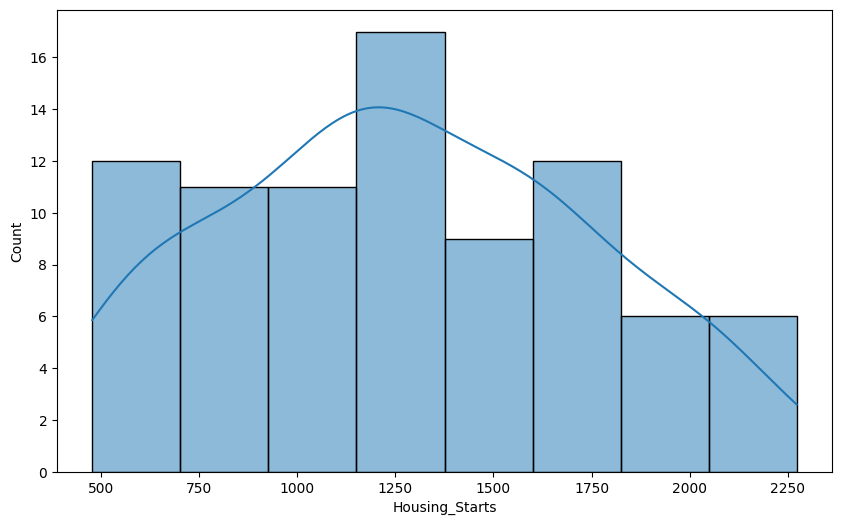

In [ ]:
for factor2 in factors2:
  plt.figure(figsize=(10, 6))
  sns.histplot(df[factor2],kde=True)

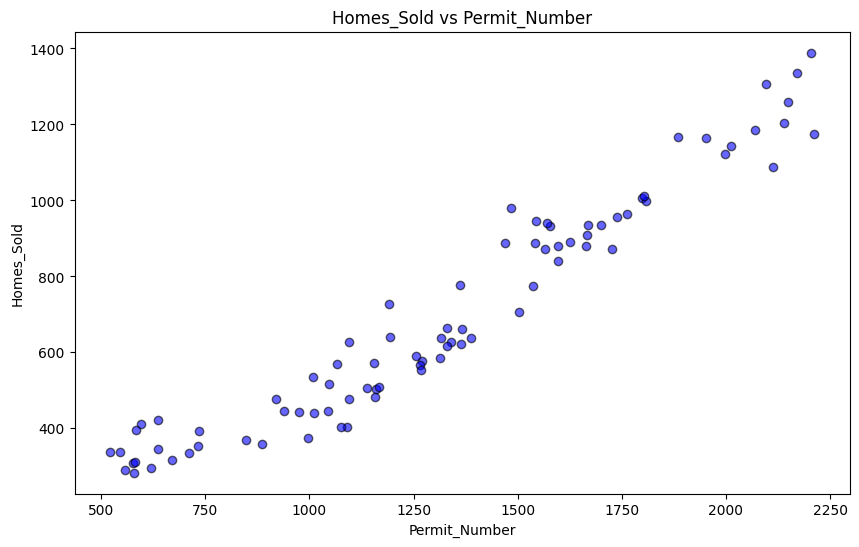

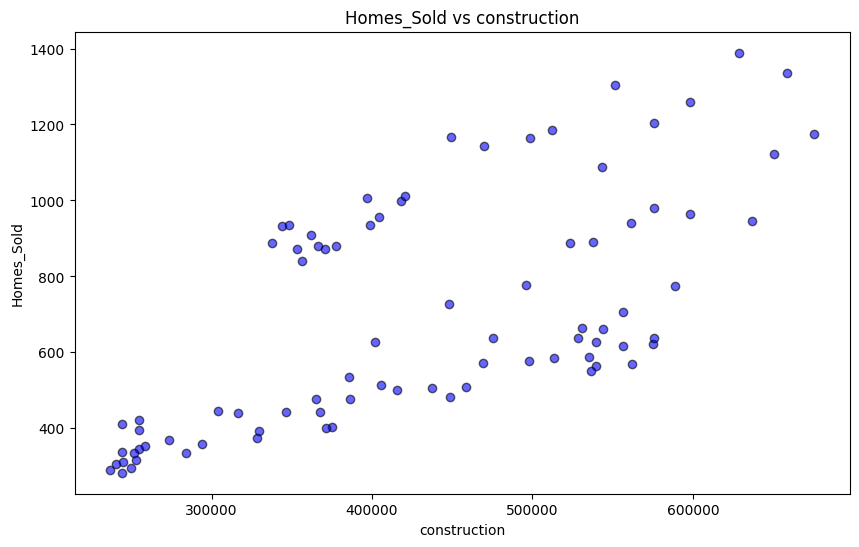

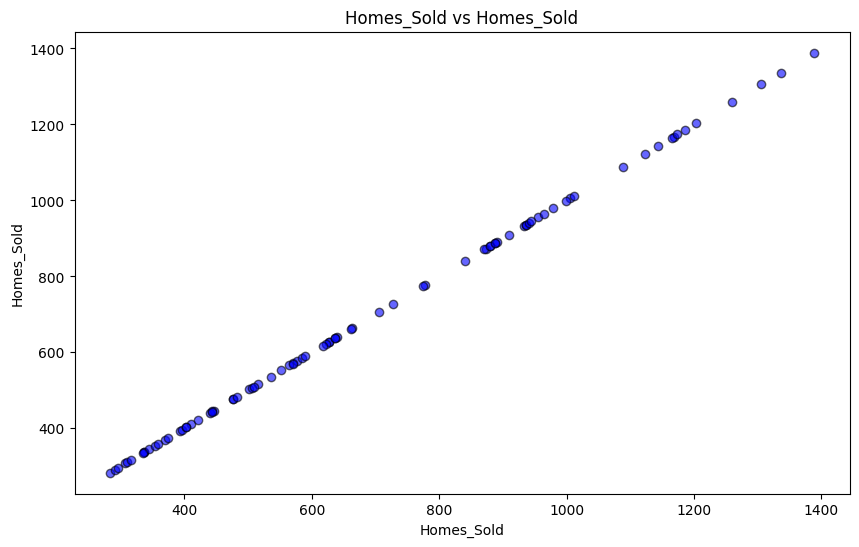

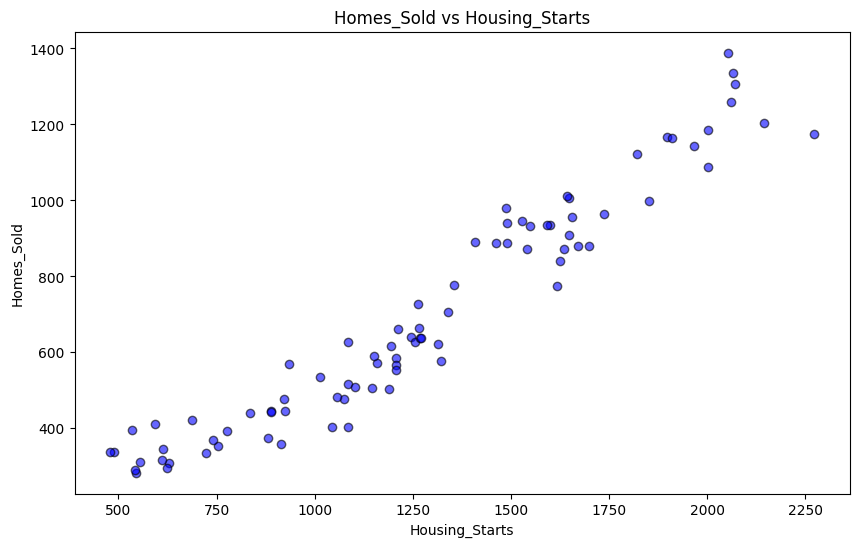

In [ ]:
houses_Sold = 'Homes_Sold'
for factor2 in factors2:
  plt.figure(figsize=(10, 6))
  plt.scatter(df[factor2], df[houses_Sold], alpha=0.6, color='b', edgecolor='k')
  plt.title(f'Homes_Sold vs {factor2}')
  plt.xlabel(factor2)
  plt.ylabel(houses_Sold)
  plt.show()

As expected as permit number increases, so does the number of houses sold.

Similarly constructed increase correlates with increases in the number of houses sold.